# Z Transform

1. When |z|<1, as n increases x[n] decays and finally dies down to zero
2. When |z|>1, as n increases x[n] grows and finally blows up to infinity
3. When |z|=1, as n increases x[n] is constant
The eigen values of the system characterised by y[n] = 2*x[n-3] is 2*z^(-3)
The transfer function of the system characterised by y[n] = 2*x[n-3] is 2*z^(-3)
Z-tranform of delta[n] is 1
Z-tranform of u[n] is z/(z-1)
Z-tranform of r[n] is z/((z-1)^2)
Z-tranform of (0.95*np.exp(1j*np.pi/10))^n*u[n] is z/(z-a) where = (0.95*np.exp(1j*np.pi/10))
Z-tranform of (1.05*np.exp(1j*np.pi/10))^n*u[n] doesnot exist
Z-tranform of n*(0.95*np.exp(1j*np.pi/10))^n*u[n] az/(z-a)^2 where = (0.95*np.exp(1j*np.pi/10))
Z-tranform of n*1.05^n*u[n] doesnot exist
Z-tranform of 0.95^n*cos(w0*n)*u[n] (z*(z-rcos(w)))/(r^2-2rzcos(w)+z^2) where = 0.95
Z-tranform of 1.05^n*cos(w0*n)*u[n] doesnot exist


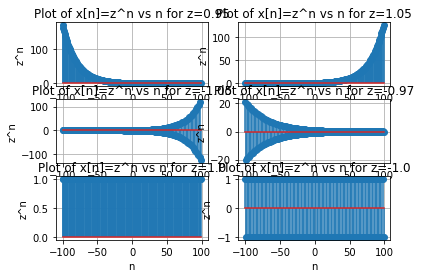

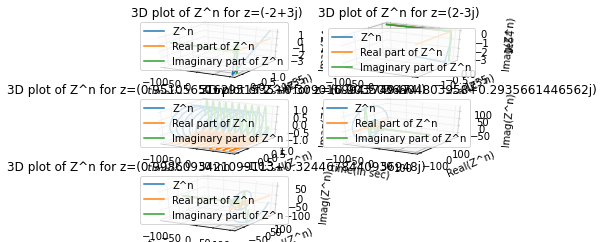

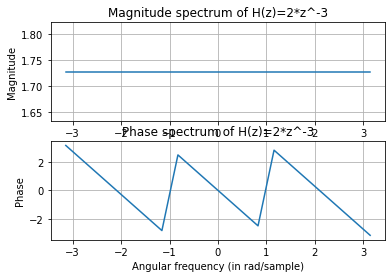

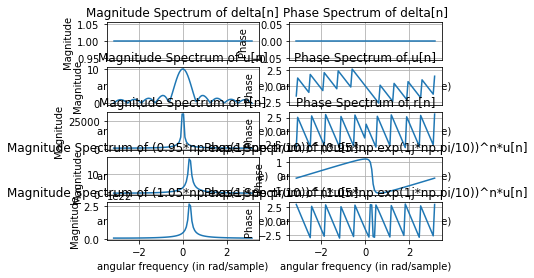

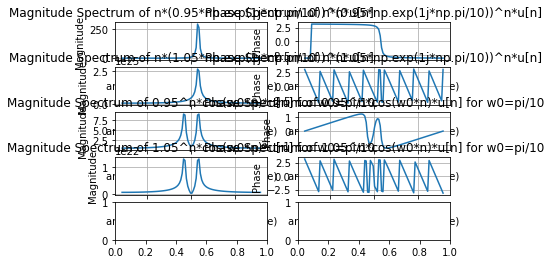

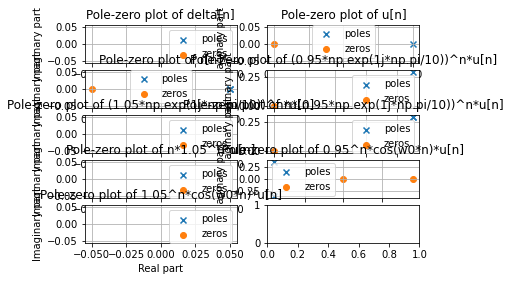

In [4]:
import numpy as np
import matplotlib.pyplot as plt



# Funtion definitions of basic signals

def impulse(n):
    temp = np.zeros(len(n))
    temp[n==0] = 1
    return temp

def step(n):
    temp = np.zeros(len(n))
    temp[n>=0] = 1
    temp[n<0] = 0
    return temp

def ramp(n):
    temp = np.zeros(len(n))
    temp[n>=0] = 1
    temp[n<0] = 0
    temp2 = np.multiply(n,temp)
    return temp2

# Function definition of z-transform
def z_transform(x,n,w):
    z = np.exp(1j*w)
    z_trans = np.zeros(len(z),dtype='complex')
    for i in z:
        for j in n:
            z_trans[z==i] += x[n==j]*(z[z==i]**(0-j))
    return z_trans
        


plt.close('all')


# Section-1
x1 = []

z1 = np.array([0.95,1.05,-1.05,-0.97,1.0,-1.0])

n1 = np.arange(-100,100)

# z^n calculation
for i in range(len(z1)):
    temp = np.float_power(z1[i],n1)
    x1.append(temp)

# Plot of z^n    
fig,ax = plt.subplots(3,2)
p = 0
for i in range(len(z1)//2):
    for j in range(2):
        ax[i,j].stem(n1,x1[p],use_line_collection=True)
        ax[i,j].set_xlabel('n')
        ax[i,j].set_ylabel('z^n')
        ax[i,j].set_title('Plot of x[n]=z^n vs n for z='+str(z1[p]))
        ax[i,j].grid()
        p += 1
        
print('1. When |z|<1, as n increases x[n] decays and finally dies down to zero')
print('2. When |z|>1, as n increases x[n] grows and finally blows up to infinity')
print('3. When |z|=1, as n increases x[n] is constant')
        

# Section-2
z2 = np.array([-2+3j,2-3j,np.exp(1j*np.pi/10),0.95*np.exp(1j*np.pi/10),1.05*np.exp(1j*np.pi/10)])
x2 = []

# z^n calculation
for i in range(len(z2)):
    temp = np.float_power(z2[i],n1)
    x2.append(temp)

# Plot of z^n 
fig = plt.figure()
subplot_no = 321
for i in range(len(z2)):
    ax = fig.add_subplot(subplot_no, projection='3d')
    ax.plot(n1,np.real(x2[i]),np.imag(x2[i]),label='Z^n')
    ax.plot(n1,np.real(x2[i]),np.zeros(len(n1))-1,label='Real part of Z^n')
    ax.plot(n1,np.zeros(len(n1))+1,np.imag(x2[i]),label='Imaginary part of Z^n')
    ax.set_title('3D plot of Z^n for z='+str(z2[i]))
    ax.set_xlabel('time(in sec)')
    ax.set_ylabel('Real(Z^n)')
    ax.set_zlabel('Imag(Z^n)')
    ax.legend()
    ax.grid()
    subplot_no += 1


# Section-3
print('The eigen values of the system characterised by y[n] = 2*x[n-3] is 2*z^(-3)')
print('The transfer function of the system characterised by y[n] = 2*x[n-3] is 2*z^(-3)')


y2 = []

for i in range(len(z2)):
    temp = 2*np.float_power(z2[i],n1-3)
    y2.append(temp)


# Section-4
w4 = np.linspace(-np.pi,np.pi,20)
r4 = 1.05
z4 = r4*np.exp(1j*w4)

# Calculation of z transform of impulse response,i.e., H(z)
H = 2*np.power(z4,-3)
 
   
# Plotting magnitude and phase spectrum of H(z)
fig,ax = plt.subplots(2,1)
ax[0].plot(w4,np.abs(H))
ax[0].set_title('Magnitude spectrum of H(z)=2*z^-3')
ax[0].set_xlabel('Angular frequency (in rad/sample)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
ax[1].plot(w4,np.angle(H))
ax[1].set_title('Phase spectrum of H(z)=2*z^-3')
ax[1].set_xlabel('Angular frequency (in rad/sample)')
ax[1].set_ylabel('Phase')
ax[1].grid()


# Section-5
n2 = np.arange(-1000,1000)
alpha = [0.95*np.exp(1j*np.pi/10),1.05*np.exp(1j*np.pi/10)]
r = [0.95,1.05]
w0 = np.pi/10
basic_sig = []
b_sig_trans = []
omeg = np.linspace(-np.pi,np.pi,100)
titles1 = []
titles2 = []
titles3 = []
labels = []
poles = []
zeros = []



# Generation of basic signals
# Computation of z tranform of basic signals
# Calculating poles and zeros of z transform of basic signals
for i in range(9):
    if i==0:
        temp_seq = impulse(n2)
        temp_title1 = 'Magnitude Spectrum of delta[n]'
        temp_title2 = 'Phase Spectrum of delta[n]'
        temp_label = 'delta[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_poles = []
        temp_zeros = []
    elif i==1:
        temp_seq = step(n2)
        temp_title1 = 'Magnitude Spectrum of u[n]'
        temp_title2 = 'Phase Spectrum of u[n]'
        temp_label = 'u[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_poles = [1+0j]
        temp_zeros = [0+0j]
    elif i==2:
        temp_seq = ramp(n2)
        temp_title1 = 'Magnitude Spectrum of r[n]'
        temp_title2 = 'Phase Spectrum of r[n]'
        temp_label = 'r[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_poles = [1+0j,1+0j]
        temp_zeros = [0+0j]
    elif i==3:
        temp_seq = np.power(alpha[0],n2)*step(n2)
        temp_title1 = 'Magnitude Spectrum of (0.95*np.exp(1j*np.pi/10))^n*u[n]'
        temp_title2 = 'Phase Spectrum of (0.95*np.exp(1j*np.pi/10))^n*u[n]'
        temp_label = '(0.95*np.exp(1j*np.pi/10))^n*u[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_pole = 0.95*np.exp(1j*np.pi/10)
        temp_poles = [temp_pole]
        temp_zeros = [0+0j]
    elif i==4:
        temp_seq = np.power(alpha[1],n2)*step(n2)
        temp_title1 = 'Magnitude Spectrum of (1.05*np.exp(1j*np.pi/10))^n*u[n]'
        temp_title2 = 'Phase Spectrum of (1.05*np.exp(1j*np.pi/10))^n*u[n]'
        temp_label = '(1.05*np.exp(1j*np.pi/10))^n*u[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_poles = []
        temp_zeros = []
    elif i==5:
        temp_seq = n2*np.power(alpha[0],n2)*step(n2)
        temp_title1 = 'Magnitude Spectrum of n*(0.95*np.exp(1j*np.pi/10))^n*u[n]'
        temp_title2 = 'Phase Spectrum of n*(0.95*np.exp(1j*np.pi/10))^n*u[n]'
        temp_label = 'n*(0.95*np.exp(1j*np.pi/10))^n*u[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_poles = [temp_pole,temp_pole]
        temp_zeros = [0+0j]
    elif i==6:
        temp_seq = n2*np.power(alpha[1],n2)*step(n2)
        temp_title1 = 'Magnitude Spectrum of n*(1.05*np.exp(1j*np.pi/10))^n*u[n]'
        temp_title2 = 'Phase Spectrum of n*(1.05*np.exp(1j*np.pi/10))^n*u[n]'
        temp_label = 'n*1.05^n*u[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_poles = []
        temp_zeros = []
    elif i==7:
        temp_seq = np.power(r[0],n2)*np.cos(w0*n2)*step(n2)
        temp_title1 = 'Magnitude Spectrum of 0.95^n*cos(w0*n)*u[n] for w0=pi/10'
        temp_title2 = 'Phase Spectrum of 0.95^n*cos(w0*n)*u[n] for w0=pi/10'
        temp_label = '0.95^n*cos(w0*n)*u[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_poles = [-0.905+0.362j,-0.905-0.362j]
        temp_zeros = [0+0j,r[0]*np.cos(w0)]
    elif i==8:
        temp_seq = np.power(r[1],n2)*np.cos(w0*n2)*step(n2)
        temp_title1 = 'Magnitude Spectrum of 1.05^n*cos(w0*n)*u[n] for w0=pi/10'
        temp_title2 = 'Phase Spectrum of 1.05^n*cos(w0*n)*u[n] for w0=pi/10'
        temp_label = '1.05^n*cos(w0*n)*u[n]'
        temp_title3 = 'Pole-zero plot of '+temp_label 
        temp_poles = []
        temp_zeros = []
    labels.append(temp_label)  
    basic_sig.append(temp_seq)
    titles1.append(temp_title1)
    titles2.append(temp_title2)
    titles3.append(temp_title3)
    temp_trans = z_transform(basic_sig[i],n2,omeg)
    b_sig_trans.append(temp_trans)
    poles.append(temp_poles)
    zeros.append(temp_zeros)



print('Z-tranform of',labels[0],'is 1')
print('Z-tranform of',labels[1],'is z/(z-1)')
print('Z-tranform of',labels[2],'is z/((z-1)^2)')
print('Z-tranform of',labels[3],'is z/(z-a) where = (0.95*np.exp(1j*np.pi/10))')
print('Z-tranform of',labels[4],'doesnot exist')
print('Z-tranform of',labels[5],'az/(z-a)^2 where = (0.95*np.exp(1j*np.pi/10))')
print('Z-tranform of',labels[6],'doesnot exist')
print('Z-tranform of',labels[7],'(z*(z-rcos(w)))/(r^2-2rzcos(w)+z^2) where = 0.95')
print('Z-tranform of',labels[8],'doesnot exist') 

   

# Plotting the magnitude and phase spectrum of z tranform of basic signals    
p = 0    
for i in range(2):
    fig,ax = plt.subplots(5,2)
    for j in range((len(basic_sig)//2)+1):
        ax[j,0].plot(omeg,np.abs(b_sig_trans[p]))
        ax[j,0].set_title(titles1[p])
        ax[j,0].set_xlabel('angular frequency (in rad/sample)')
        ax[j,0].set_ylabel('Magnitude')
        ax[j,0].grid()
        ax[j,1].plot(omeg,np.angle(b_sig_trans[p]))
        ax[j,1].set_title(titles2[p])
        ax[j,1].set_xlabel('angular frequency (in rad/sample)')
        ax[j,1].set_ylabel('Phase')
        ax[j,1].grid()
        p+=1
        if p>8:
            break
    if p>8:
        break


# Plotting the poles and zeros of z-transform of basic signals     
p = 0
fig,ax = plt.subplots(5,2)
for j in range((len(basic_sig)//2)+1):
    ax[j,0].scatter(np.real(np.array(poles[p])),np.imag(np.array(poles[p])),marker='x',label='poles')
    ax[j,0].scatter(np.real(np.array(zeros[p])),np.imag(np.array(zeros[p])),marker='o',label='zeros') 
    ax[j,0].set_title(titles3[p])
    ax[j,0].set_xlabel('Real part')
    ax[j,0].set_ylabel('Imaginary part')
    ax[j,0].legend()
    ax[j,0].grid()
    p+=1
    if p>8:
        break
    ax[j,1].scatter(np.real(np.array(poles[p])),np.imag(np.array(poles[p])),marker='x',label='poles')
    ax[j,1].scatter(np.real(np.array(zeros[p])),np.imag(np.array(zeros[p])),marker='o',label='zeros') 
    ax[j,1].set_title(titles3[p])
    ax[j,1].set_xlabel('Real part')
    ax[j,1].set_ylabel('Imaginary part')
    ax[j,1].legend()
    ax[j,1].grid()
    p+=1
    if p>8:
        break

# Discrete Time Fourier series

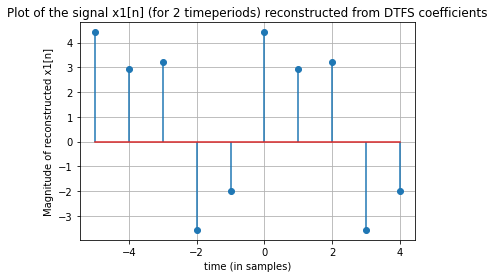

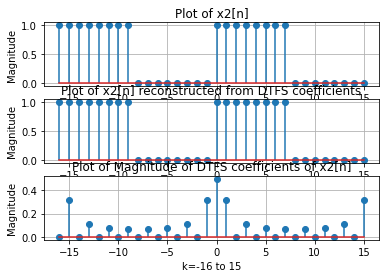

In [5]:
import numpy as np
import matplotlib.pyplot as plt


plt.close('all')


# Function definition of DTFS synthesis signal
def synthesis(t,a,N):
    temp_x = np.zeros(len(t),dtype='complex')
    for n in range(N):
        for k in range(N):
            temp_x[t==n] += a[k]*np.exp(1j*k*2*np.pi*n/N)
        p = n-N
        temp_x[t==p] = temp_x[t==n]
    return temp_x


# Function definition of DTFS analysis signal
def analysis(t,x,N):
    temp_a = np.zeros(len(t),dtype='complex')
    for k in range(N):
        for n in range(N):
            temp_a[t==k] += x[n]*np.exp(-1j*k*2*np.pi*n/N)
        temp_a[t==(0-k)] = np.conj(temp_a[t==k])
    temp_a = temp_a/N
    return temp_a
            

# Section-1
    
# Calculation of DTFS coefficients

# Given, 
# N = 5, a_0 = 1, a_2 = a_-2* = exp(jpi/4), a_4 = a_-4* = 2*exp(jpi/3)

# --> a_-2 = exp(-jpi/4) and a_-4 = 2*exp(-jpi/3)

# Since the DTFS coefficients, a_k are periodic with period N, a_k+N=a_k

# --> a_-2 = a_(-2+5) = a_3 and a_-4 = a_(-4+5) = a_1

# a_3 = a_-2 and a_1 = a_-4

# Time period fo x1[n]
N1 = 5

# Range of values of time samples of x1[n]
t1 = np.arange(0-N1,N1)

# DTFS coefficients of x1[n]
a1_0 = 1
a1_2 = np.exp(1j*np.pi/4)
a1_4 = 2*np.exp(1j*np.pi/3)
a1_1 = np.conj(a1_4)
a1_3 = np.conj(a1_2)
a1 = np.array([a1_0,a1_1,a1_2,a1_3,a1_4])

# Reconstructed signal of x1[n]
x1_recon = synthesis(t1,a1,N1)

# Plotting the reconstructed signal x1[n]
fig,ax = plt.subplots()
ax.stem(t1[0:],np.real(x1_recon), use_line_collection=True)
ax.set_title('Plot of the signal x1[n] (for 2 timeperiods) reconstructed from DTFS coefficients')
ax.set_xlabel('time (in samples)')
ax.set_ylabel('Magnitude of reconstructed x1[n]')
ax.grid()

# Section-2

# Time period fo x2[n]
N2 = 16

# Range of values of time samples of x2[n]
t2 = np.arange(0-N2,N2)

# x2[n] signal description

# Given,
# x[n] is periodic with period=N=16
# x[n] = 1 for n=0,1,2,3,4,5,6,7
#      = 0 for n=8,9,10,11,12,13,14,15


x2 = np.zeros(len(t2))
x2[(t2>=0) & (t2<(N2/2))] = 1
x2[(t2>=N2/2)] = 0
x2[(t2>=(0-N2)) & (t2<(-N2/2))] = 1
x2[(t2>=(-N2/2)) & (t2<0)] = 0

# Calculation of DTFS coefficients of x2[n]
a2 = analysis(t2,x2,N2)

# Reconstruction of x2[n] from DTFS coefficients
x2_recon = synthesis(t2,a2[N2:],N2)
xlabels2 = ['time(in samples)','time(in samples)','k=-16 to 15']
yvalues2 = [x2,np.real(x2_recon),np.abs(a2)]
titles2 = ['Plot of x2[n]','Plot of x2[n] reconstructed from DTFS coefficients','Plot of Magnitude of DTFS coefficients of x2[n]']


# Plotting the x2[n], reconstructed x2[n] and Magnitude of DTFS coefficients
fig,ax = plt.subplots(3,1)
for i in range(len(yvalues2)):
    ax[i].stem(t2,yvalues2[i],use_line_collection=True)
    ax[i].set_xlabel(xlabels2[i])
    ax[i].set_ylabel('Magnitude')
    ax[i].set_title(titles2[i])
    ax[i].grid()


# Continous Time Fourier Transform

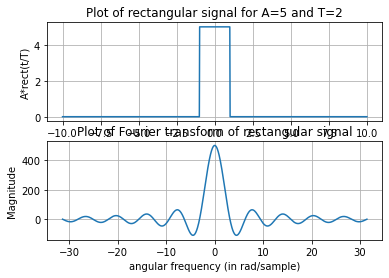

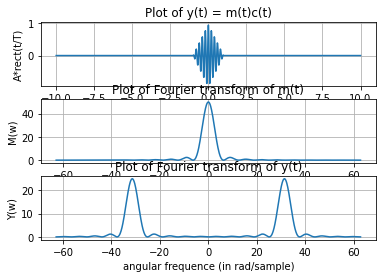

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')


# Function definition of rectangular signal
def rectangular(t,A,T):
    seq = np.zeros(len(t))
    seq[(t>=-T/2) & (t<=T/2)] = A
    seq[(t>T/2) & (t<-T/2)] = 0
    return seq


# Function definition of triangular signal
def triangular(t,A,T):
    seq = np.zeros(len(t))
    seq[(t>=-T/2) & (t<=T/2)] = A*(1-abs(t[(t>=-T/2) & (t<=T/2)]))
    seq[(t>T/2) & (t<-T/2)] = 0
    return seq


# Function definition of carrier signal
def carrier(t,fc):
    seq = np.zeros(len(t))
    seq = np.cos(2*np.pi*fc*t)
    return seq
 

# Function definition of Fourier transform   
def fourier_transform(t,x,w):
    seq = np.zeros(len(w),dtype='complex')
    for i in range(len(w)):
        seq[i] = np.sum(x*np.exp(-1j*w[i]*t))
    return seq
    


# Initialization of parameters related to x1[n]

N1 = 1000
A1 = 5
T1 = 2

# Calculation of fourier transform of x1[n]
t1 = np.linspace(-10,10,N1)
x1 = rectangular(t1,A1,T1)
M1 = 1000
w1 = np.linspace(-10*np.pi,10*np.pi,M1)
X1 = fourier_transform(t1,x1,w1)


# Plotting the fourier transform of x1[n]
fig,ax = plt.subplots(2,1)
ax[0].plot(t1,x1)
ax[0].set_title('Plot of rectangular signal for A=5 and T=2')
ax[0].set_xlabel('time (in sample)')
ax[0].set_ylabel('A*rect(t/T)')
ax[0].grid()
ax[1].plot(w1,np.real(X1))
ax[1].set_title('Plot of Fourier transform of rectangular signal')
ax[1].set_xlabel('angular frequency (in rad/sample)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()


# Initialization of parameters related to x2[n]
fc2 = 5
A2 = 1
T2 = 2
w2 = np.linspace(-20*np.pi,20*np.pi,M1)

# Generating the carrier, message and y(t) signals
c = carrier(t1,fc2)
m = triangular(t1,A2,T2)
y = c*m

# Calculation of Fourier transform of m(t) and y(t)
M = fourier_transform(t1,m,w2)
Y = fourier_transform(t1,y,w2)
x_values = [t1,w2,w2]
y_values = [y,np.real(M),np.real(Y)]
xlabels2 = ['time (in sample)','angular frequence (in rad/sample)','angular frequence (in rad/sample)']
ylabels2 = ['A*rect(t/T)','M(w)','Y(w)']
titles2 = ['Plot of y(t) = m(t)c(t)','Plot of Fourier transform of m(t)','Plot of Fourier transform of y(t)']


# Plotting y(t) and Fourier transforms of m(t) and y(t)
fig,ax = plt.subplots(3,1)
for i in range(len(ylabels2)):
    ax[i].plot(x_values[i],y_values[i])
    ax[i].set_title(titles2[i])
    ax[i].set_xlabel(xlabels2[i])
    ax[i].set_ylabel(ylabels2[i])
    ax[i].grid()
